In [1]:
#autograd包为张量上的所有操作提供了自动求导机制
#它是一个在运行时定义的框架，这意味着反向传播是根据代码如何运行来决定的，并且每次迭代可以是不同的
#下面让我们看一些例子



#张量：torch.Tensor()是这个包的核心类。如果设置它的属性.requires_grad为True，那么它将会追踪对于该张量的所有操作
#当完成计算后可以通过调用.backward()，来自动计算所有梯度，这个张量的所有梯度将会自动累加到.grad属性上。
#要阻止一个张量被跟踪历史，可以调用.detach()方法将其与计算历史分离，并阻止他未来的计算记录被跟踪。



#还有一个类对于autograd的实现非常重要：Function
#Tensor和Function互相连接成了一个无圈图(acyclic graph)，他编码了完整的计算历史
#每个张量都有一个.grad_fn属性，该属性引用了创建Tensot自身的Function。
#如果需要计算导数，可以再Tensor上调用.backward()。如果Tensor是一个标量（即它包含一个元素的数据），则不需要为backward()指定任何参数
#但是如果他有更多的元素，则需要指定一个gradient参数，该参数是形状匹配的张量。



tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward1>)
False
True
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


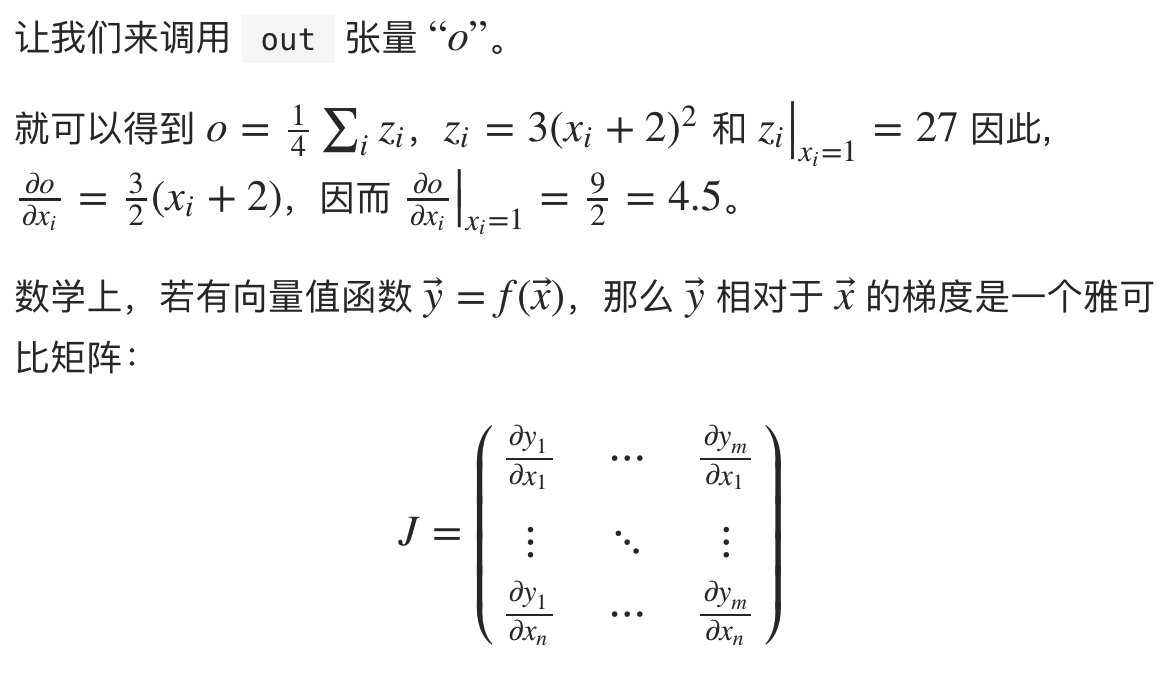

In [22]:
import torch

x = torch.ones(2,2, requires_grad=True)
#创建一个张量并设置requires_grad=True用来追踪其计算历史
print(x)

y = x+2 
#对这个张量x做一次运算
print(y)
print(y.grad_fn)
#y是计算结果，所以他有grad_fn属性

#对y进行更多的操作
z = y*y*3
out = z.mean()
print(z)
print(out)


#.requires_grad_(...)原地改变了现有张量的requires_grad标注，如果没有指定的话，默认输入的这个标志是False
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)


#梯度
#现在开始进行反向传播，因为out是一个标量，因此out.backward()和out.backward(torch.tensor(1.))等价
out.backward()
print(x.grad)#这里是输出导数d(out)/dx
#我们得到的结果是tensor([[4.5000, 4.5000],[4.5000, 4.5000]]),是一个数值全为4.5的矩阵


from IPython.display import Image
Image(filename="img/1.png", width=400, height=400)
#1.png和下面的2.png中存储的都是pytorch官方文档对得到雅克比矩阵的解释

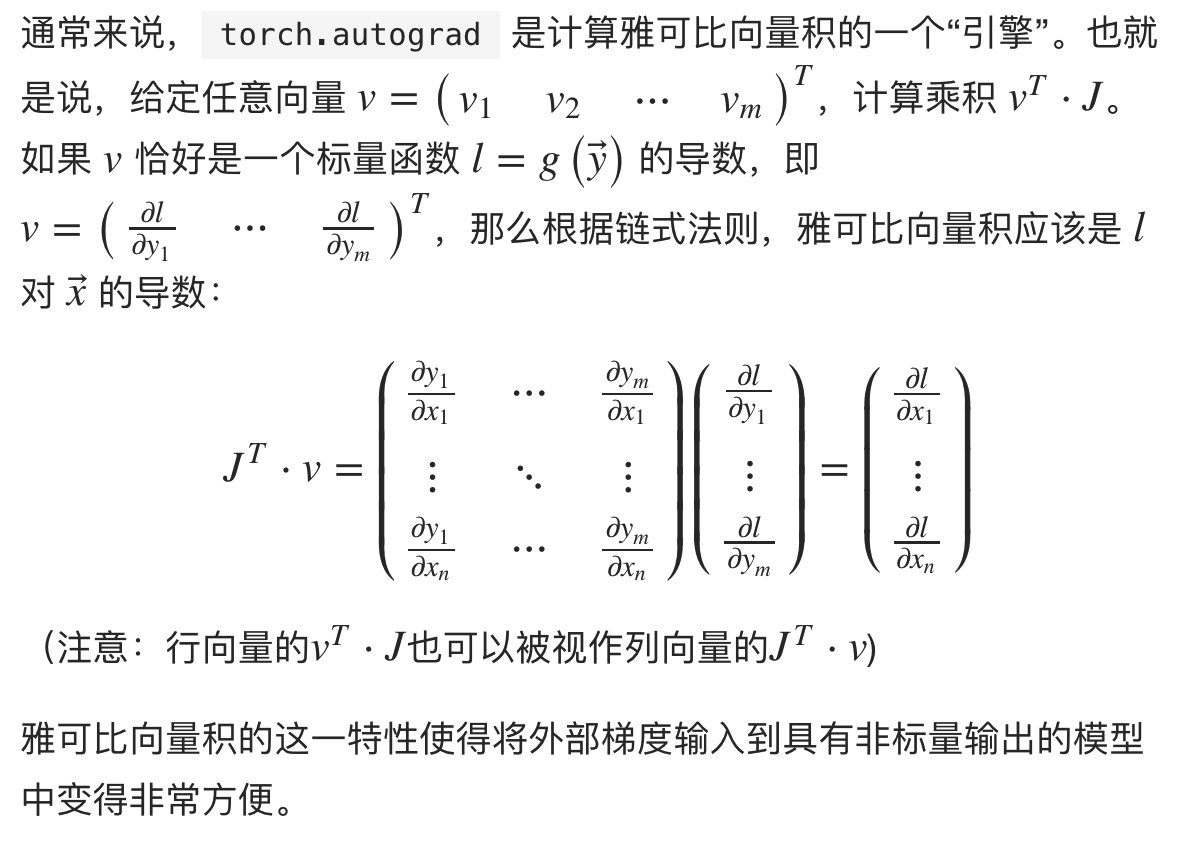

In [23]:

Image(filename="img/2.png", width=400, height=400)

In [25]:
#下面来看一个雅克比向量积的例子

x = torch.randn(3, requires_grad=True)
print("x is:",x)
y = x*2
while y.data.norm() < 1000:
    y = y * 2
print("y is:",y)







x is: tensor([0.2688, 0.0292, 0.3803], requires_grad=True)
y is: tensor([1100.8008,  119.7004, 1557.5170], grad_fn=<MulBackward0>)
